<a href="https://github.com/hardayal/EVA/blob/master/Session_9/EVA_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

### Import Libraries and modules
### Installation and importing of packages used by the network

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import cv2
import sys

Using TensorFlow backend.


### Loading data from CIFAR10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


### Display pictures of different classes

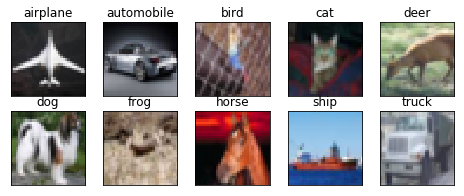

In [0]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Drawing model accuracy(Train vs Validation) and model loss(Train vs Valisation) from model execution history

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Calculating accuracy of a model from the input dataset and model

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Pixel normalization and using hot encoding converting the output labels into hot encoding values for train and test dataset

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Defining a sequential model without cut out and applying Grad-Cam to layer before final Convolution layer and drawing the heat map

In [0]:
# Define the model
new_model = Sequential()
new_model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
new_model.add(Activation('relu'))#32
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(128, 3, 3))
new_model.add(Activation('relu'))#30
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(MaxPooling2D(pool_size=(2, 2)))#15
new_model.add(Convolution2D(64, 1, activation='relu'))

new_model.add(Convolution2D(128, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#15
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(256, 3, 3))
new_model.add(Activation('relu'))#13

new_model.add(MaxPooling2D(pool_size=(2, 2)))#6
new_model.add(Convolution2D(128, 1, activation='relu'))

new_model.add(Convolution2D(256, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#6
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(512, 3, 3))
new_model.add(Activation('relu'))#4x4
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(256, 1, 1, activation='relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(num_classes, 4, 4))#1
new_model.add(Flatten())
new_model.add(Activation('softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0802 13:04:33.314426 139990271784832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0802 13:04:33.358656 139990271784832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 13:04:33.365648 139990271784832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 13:04:33.416846 139990271784832 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [0]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 128)       512       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=50)`
  
W0802 13:07:28.280258 139990271784832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a 

Epoch 1/50
195/195 [==============================] - 52s 268ms/step - loss: 1.7558 - acc: 0.4182 - val_loss: 2.4603 - val_acc: 0.3156

Epoch 00001: val_acc improved from -inf to 0.31560, saving model to EVA_Assignment_9.h5
Epoch 2/50
195/195 [==============================] - 47s 239ms/step - loss: 1.2151 - acc: 0.5861 - val_loss: 1.3553 - val_acc: 0.5427

Epoch 00002: val_acc improved from 0.31560 to 0.54270, saving model to EVA_Assignment_9.h5
Epoch 3/50
195/195 [==============================] - 46s 237ms/step - loss: 1.0139 - acc: 0.6609 - val_loss: 1.2399 - val_acc: 0.5805

Epoch 00003: val_acc improved from 0.54270 to 0.58050, saving model to EVA_Assignment_9.h5
Epoch 4/50
195/195 [==============================] - 46s 236ms/step - loss: 0.8394 - acc: 0.7199 - val_loss: 0.8535 - val_acc: 0.7113

Epoch 00004: val_acc improved from 0.58050 to 0.71130, saving model to EVA_Assignment_9.h5
Epoch 5/50
195/195 [==============================] - 46s 236ms/step - loss: 0.7446 - acc: 0.75

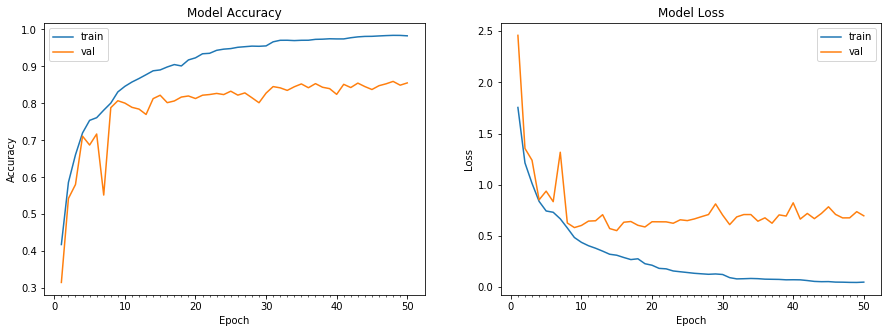

Accuracy on test data is: 85.94


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
checkpointer = ModelCheckpoint(filepath='EVA_Assignment_9.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)

# train the model
start = time.time()

# Train the model
new_model_info = new_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256), samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                         validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer, lr_reducer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(new_model_info)

# compute test accuracy
# Load the weights with the best validation accuracy:
new_model.load_weights('EVA_Assignment_9.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, new_model))

W0802 13:48:40.554656 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0802 13:48:40.939144 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0802 13:48:41.317260 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0802 13:48:41.709683 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


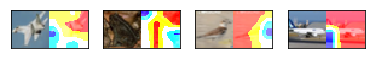

In [0]:
from keras.preprocessing import image

fig = plt.figure(figsize=(8,3))
random_image_index = [10, 30, 70, 90]
model = new_model
new_model.load_weights('EVA_Assignment_9.h5')

for i in enumerate(random_image_index):
  ax = fig.add_subplot(2, 5, 1 + i[0], xticks=[], yticks=[])
  img = test_features[i[1],:]
  
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0, dtype=cv2.CV_32F)
  
  concatimg = cv2.hconcat([img, superimposed_img])
  plt.imshow(concatimg)
plt.show()

### Implementing Cutout in the original model and show the heat map

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=50)`
  


Epoch 1/50
195/195 [==============================] - 46s 238ms/step - loss: 0.3356 - acc: 0.8932 - val_loss: 0.6051 - val_acc: 0.8396

Epoch 00001: val_acc improved from -inf to 0.83960, saving model to EVA_Assignment_9_cut_out.h5
Epoch 2/50
195/195 [==============================] - 46s 235ms/step - loss: 0.2562 - acc: 0.9121 - val_loss: 0.5184 - val_acc: 0.8561

Epoch 00002: val_acc improved from 0.83960 to 0.85610, saving model to EVA_Assignment_9_cut_out.h5
Epoch 3/50
195/195 [==============================] - 46s 236ms/step - loss: 0.2329 - acc: 0.9186 - val_loss: 0.5197 - val_acc: 0.8591

Epoch 00003: val_acc improved from 0.85610 to 0.85910, saving model to EVA_Assignment_9_cut_out.h5
Epoch 4/50
195/195 [==============================] - 46s 235ms/step - loss: 0.2204 - acc: 0.9233 - val_loss: 0.5713 - val_acc: 0.8385

Epoch 00004: val_acc did not improve from 0.85910
Epoch 5/50
195/195 [==============================] - 46s 235ms/step - loss: 0.2094 - acc: 0.9269 - val_loss: 0.

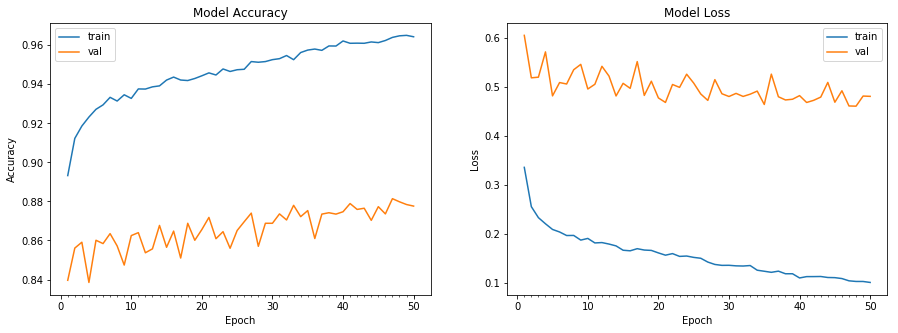

Accuracy on test data is: 88.14


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False, preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
checkpointer = ModelCheckpoint(filepath='EVA_Assignment_9_cut_out.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)

# train the model
start = time.time()

# Train the model
new_model_info = new_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256), samples_per_epoch = train_features.shape[0], nb_epoch = 50,
                                         validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer, lr_reducer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(new_model_info)

# compute test accuracy
# Load the weights with the best validation accuracy:
new_model.load_weights('EVA_Assignment_9_cut_out.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, new_model))

W0802 14:28:31.734787 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0802 14:28:32.157859 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0802 14:28:32.554703 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
W0802 14:28:32.984045 139990271784832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


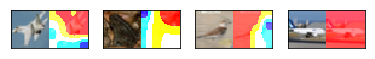

In [0]:
from keras.preprocessing import image

fig = plt.figure(figsize=(8,3))
random_image_index = [10, 30, 70, 90]
model = new_model

for i in enumerate(random_image_index):
  ax = fig.add_subplot(2, 5, 1 + i[0], xticks=[], yticks=[])
  img = test_features[i[1],:]
  
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)
  
  concatimg = cv2.hconcat([img, superimposed_img])
  plt.imshow(concatimg)
plt.show()

#### Result Comparision - 

-  #### Model with cut out has better validation accuracy than model without cutout 
-   #### In Model with cut out identifies small details in an image, example in image 3 it identifies the eye of the bird and fir image 1 it identifies the entire aeroplane strucutre not only wings. 

